# API

In [5]:
import requests

In [6]:
myAPIKey = "ftdgFfXtnH2CJdSLUt3A5NWo2dJCQZXF"

In [7]:
year = 2024
month = 2

URL = f"https://api.nytimes.com/svc/archive/v1/{year}/{month}.json?api-key={myAPIKey}"
print(URL)

https://api.nytimes.com/svc/archive/v1/2024/2.json?api-key=ftdgFfXtnH2CJdSLUt3A5NWo2dJCQZXF


In [8]:
data = requests.get(URL) 
data.status_code

200

In [9]:
articles = data.json()
len(articles) 

2

In [10]:
articles.keys()

dict_keys(['copyright', 'response'])

In [11]:
articles['response']['docs'][0]

{'abstract': 'Periods of backlash take shape after surges of Black progress. We have entered another such period.',
 'web_url': 'https://www.nytimes.com/2024/01/31/opinion/racist-backlash-history.html',
 'snippet': 'Periods of backlash take shape after surges of Black progress. We have entered another such period.',
 'lead_paragraph': 'I am fascinated, and alarmed, by the swiftness with which periods of backlash take shape after surges of Black progress, and I believe that we have entered another such period.',
 'print_section': 'A',
 'print_page': '21',
 'source': 'The New York Times',
 'multimedia': [{'rank': 0,
   'subtype': 'xlarge',
   'caption': None,
   'credit': None,
   'type': 'image',
   'url': 'images/2024/02/01/multimedia/31blow1-hvfq/31blow1-hvfq-articleLarge.jpg',
   'height': 800,
   'width': 600,
   'subType': 'xlarge',
   'crop_name': 'articleLarge',
   'legacy': {'xlarge': 'images/2024/02/01/multimedia/31blow1-hvfq/31blow1-hvfq-articleLarge.jpg',
    'xlargewidth': 6

In [12]:
sections = {}
for i in range(len(articles['response']['docs'])):
    if articles['response']['docs'][i]['section_name'] in sections: 
        sections[articles['response']['docs'][i]['section_name']] += 1
    else: 
        sections[articles['response']['docs'][i]['section_name']] = 1

In [13]:
sections

{'Opinion': 272,
 'New York': 200,
 'World': 513,
 'U.S.': 734,
 'Crosswords & Games': 125,
 'Food': 80,
 'Briefing': 77,
 'Arts': 326,
 'The Learning Network': 78,
 'Times Insider': 22,
 'Travel': 31,
 'Books': 139,
 'Real Estate': 62,
 'Theater': 58,
 'Technology': 49,
 'Business Day': 244,
 'Well': 47,
 'Movies': 123,
 'Magazine': 41,
 'The Upshot': 19,
 'Podcasts': 79,
 'Style': 174,
 'Health': 58,
 'Science': 50,
 'Corrections': 56,
 'Climate': 50,
 'T Magazine': 51,
 'Your Money': 7,
 'T Brand': 4,
 'Obituaries': 3,
 'Smarter Living': 3,
 'Headway': 4,
 'Sports': 7,
 'Today’s Paper': 2,
 'Fashion & Style': 2,
 'International Home': 1}

# 3/5 cosine similarity

In [14]:
import numpy as np
from numpy.linalg import norm

def cosineSimilarity(vec1, vec2): 
    V1 = np.array(vec1)
    V2 = np.array(vec2)
    cosine = np.dot(V1, V2)/(norm(V1)*norm(V2))
    return cosine

In [15]:
docs = ["she wore a dress and red earrings",                           # d1
"the dress has a red wine stain",                                      # d2
"tomorrow I will wear my new red dress",                               # d3
"the red dress in the photo resembles the red dress she is wearing",   # d4
"short dress",                                                         # d5
"red lipstick"]                                                        # d6

In [16]:
def createVoc(doc):
    wordList = []
    for row in doc:
        if len(row) != 0: #make sure the string isn't empty
            wordList += row.lower().split(' ') #split & add individual hashtags into the list
    wordList = np.unique(wordList).tolist() #eliminate duplicate hashtags
    wordList.sort()
    return wordList

In [17]:
def createWordlist(doc):
    wordList = []
    wordList += doc.lower().split(' ')
    wordList = np.unique(wordList).tolist() #eliminate duplicate hashtags
    wordList.sort()
    return wordList

In [18]:
voc = createVoc(docs)
voc

['a',
 'and',
 'dress',
 'earrings',
 'has',
 'i',
 'in',
 'is',
 'lipstick',
 'my',
 'new',
 'photo',
 'red',
 'resembles',
 'she',
 'short',
 'stain',
 'the',
 'tomorrow',
 'wear',
 'wearing',
 'will',
 'wine',
 'wore']

In [19]:
def vector(doc, voc):
    #creates a vector list given a doc (string) and a vocabulary list 
    query = createWordlist(doc)
    vector = []
    for word in voc:
        if word in query:
            vector.append(query.count(word))
        else:
            vector.append(0)
    return vector

In [20]:
doc1 = "she wore a dress and red earrings"
doc2 = "the dress has a red wine stain"

In [21]:
createWordlist(doc1)

['a', 'and', 'dress', 'earrings', 'red', 'she', 'wore']

In [22]:
vec1 = vector(doc1, voc)
vec2 = vector(doc2, voc)

In [23]:
cosineSimilarity(vec1, vec2)

0.4285714285714285

In [24]:
def getAllCosineSimilarity(docList):
    allCosineSimilarity = []
    voc = createVoc(docList)
    for doc1 in docList:
        docCosineSimilarity = []
        vec1 = vector(doc1, voc)
        for doc2 in docList:
            vec2 = vector(doc2, voc)
            docCosineSimilarity.append(cosineSimilarity(vec1, vec2))
        allCosineSimilarity.append(docCosineSimilarity)
    return allCosineSimilarity

In [26]:
csMatrix = getAllCosineSimilarity(docs)

Doc 0: she wore a dress and red earrings
Doc 1: the dress has a red wine stain
Doc 2: tomorrow I will wear my new red dress
Doc 3: the red dress in the photo resembles the red dress she is wearing
Doc 4: short dress
Doc 5: red lipstick


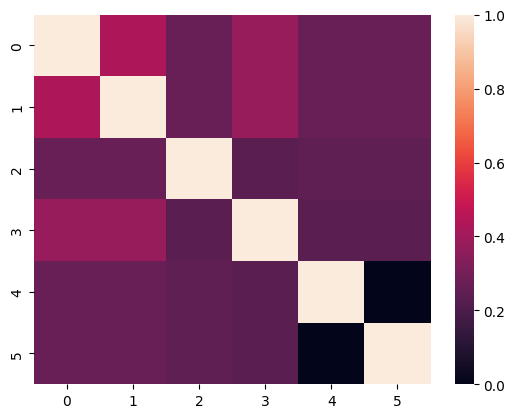

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

graph = sns.heatmap(csMatrix)

i = 0
for doc in docs:
    print(f'Doc {i}: {doc}')
    i += 1